In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

cab_rides = pd.read_csv('cab_rides.csv')
weather = pd.read_csv('weather.csv')

In [ ]:
cab_rides = cab_rides.drop_duplicates()
weather = weather.drop_duplicates()

In [ ]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [ ]:
cab_rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [ ]:
cab_rides.to_sql("cab_rides", con =engine)

73754

In [ ]:
df = '''
select * from cab_rides where cab_type = 'Lyft'
'''
lyft_rides = pd.read_sql_query(df,con=engine)

In [ ]:
df = '''
select * from cab_rides where cab_type = 'Uber'
'''
uber_rides = pd.read_sql_query(df,con=engine)

In [ ]:
uber_mean_price = uber_rides['price'].mean()
print(uber_mean_price)

15.795343166912708


In [ ]:
uber_median_price = uber_rides['price'].median()
print(uber_median_price)

12.5


In [ ]:
uber_std_price = uber_rides['price'].std()
print(uber_std_price)

8.560299982017439


In [ ]:
uber_mean_distance = uber_rides['distance'].mean()
print(uber_mean_distance)

2.1913859509468114


In [ ]:
uber_median_distance = uber_rides['distance'].median()
print(uber_median_distance)

2.17


In [ ]:
uber_std_distance = uber_rides['distance'].std()
print(uber_mean_distance)

2.1913859509468114


In [ ]:
lyft_mean_price = lyft_rides['price'].mean()
print(lyft_mean_price)

17.351396125019512


In [ ]:
lyft_median_price = lyft_rides['price'].median()
print(lyft_median_price)

16.5


In [ ]:
lyft_std_price = lyft_rides['price'].std()
print(lyft_std_price)

10.019170761821647


In [ ]:
lyft_mean_distance = lyft_rides['distance'].mean()
print(lyft_mean_distance)

2.186975582938635


In [ ]:
lyft_median_distance = lyft_rides['distance'].median()
print(lyft_median_distance)

2.14


In [ ]:
lyft_std_distance = lyft_rides['distance'].std()
print(lyft_std_distance)

1.0866216748358941


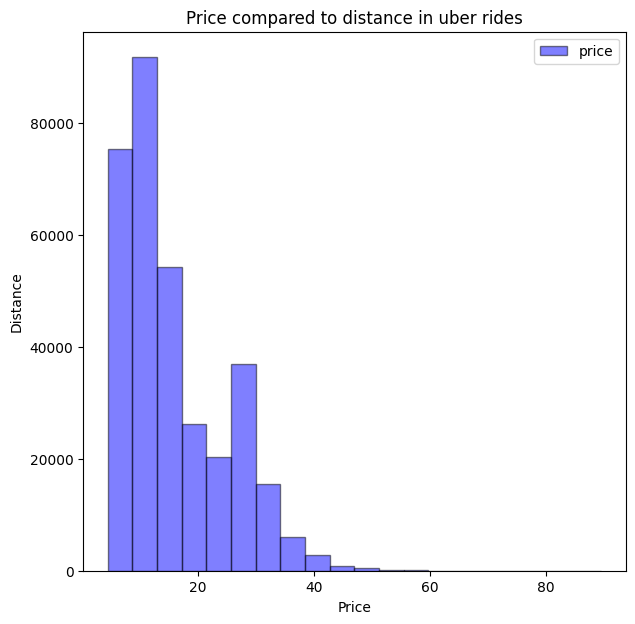

In [ ]:
col1 = uber_rides['price']
col2 = uber_rides['distance']
plt.figure(figsize=(7,7))
plt.hist(col1, bins=20, alpha = 0.5, label = 'price', color='blue', edgecolor='black')
plt.title('Price compared to distance in uber rides')
plt.xlabel('Price')
plt.ylabel('Distance')
plt.legend(loc='upper right')
plt.show()

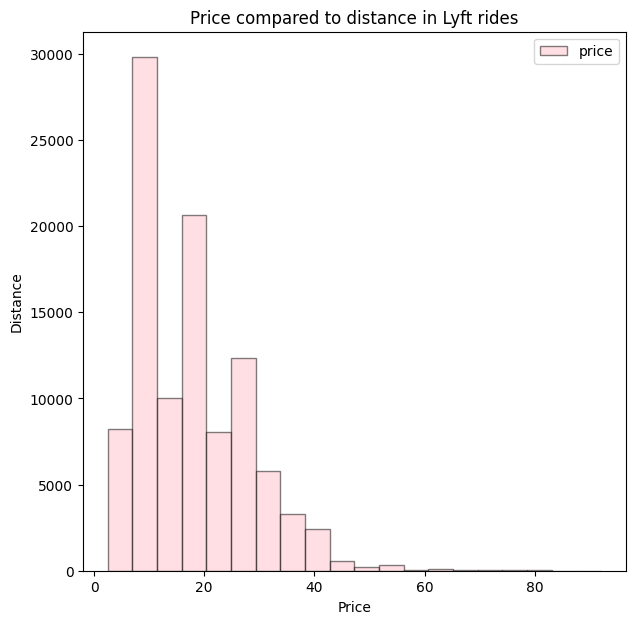

In [ ]:
col1 = lyft_rides['price']
plt.figure(figsize=(7,7))
plt.hist(col1, bins=20, alpha = 0.5, label = 'price', color='Pink', edgecolor='black')
plt.title('Price compared to distance in Lyft rides')
plt.xlabel('Price')
plt.ylabel('Distance')
plt.legend(loc='upper right')
plt.show()

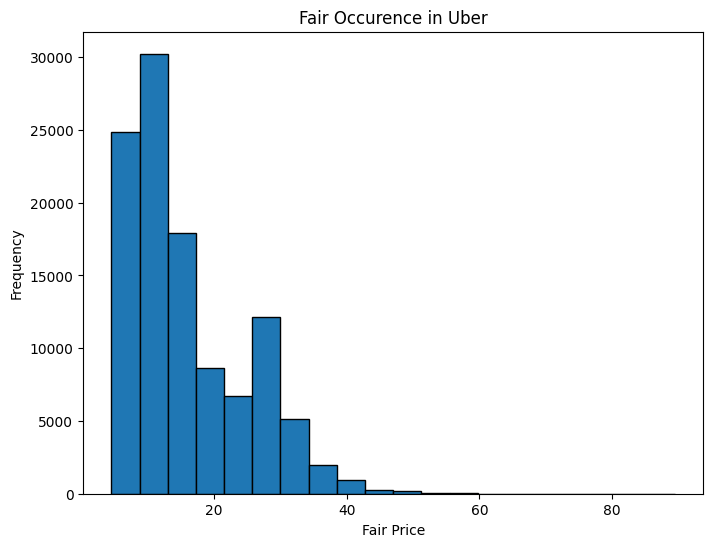

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(uber_rides['price'].dropna(), bins=20, edgecolor='black')
plt.title('Fair Occurence in Uber')
plt.xlabel('Fair Price')
plt.ylabel('Frequency')
plt.show()

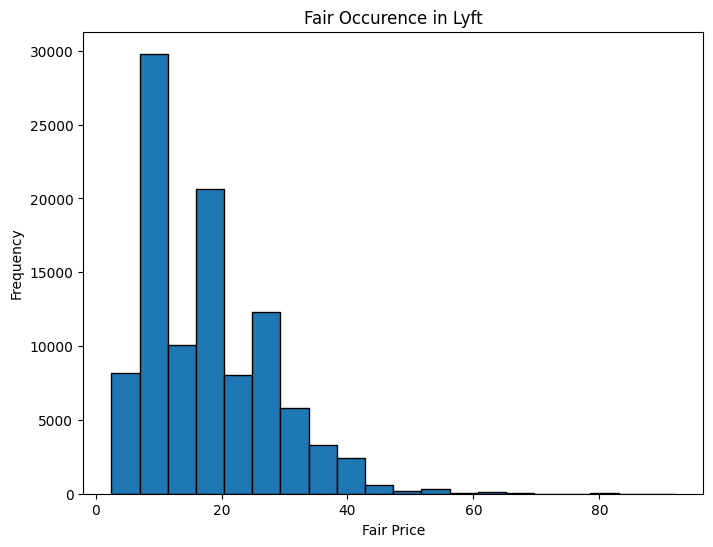

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(lyft_rides['price'].dropna(), bins=20, edgecolor='black')
plt.title('Fair Occurence in Lyft')
plt.xlabel('Fair Price')
plt.ylabel('Frequency')
plt.show()

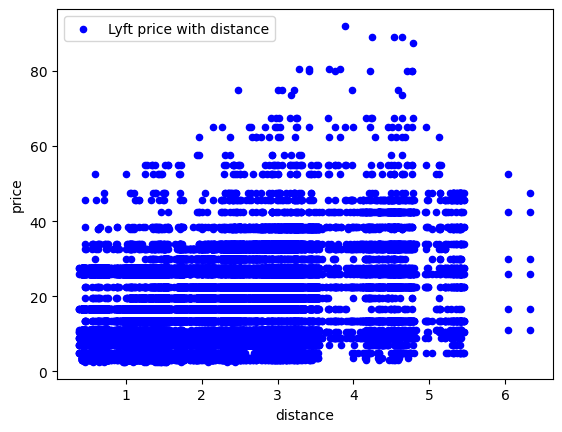

In [ ]:
lyft_rides.plot.scatter(x='distance', y='price', color='blue', label='Lyft price with distance')
plt.show()

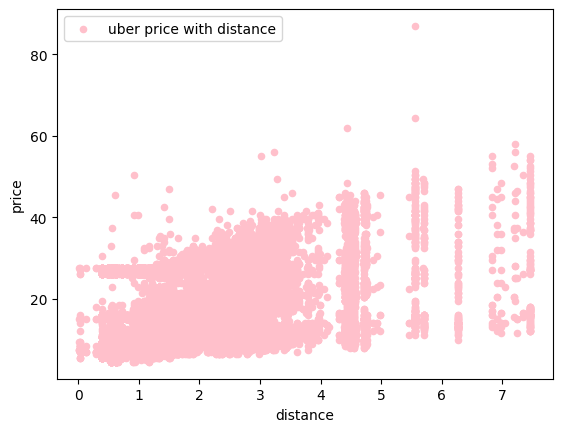

In [ ]:
uber_rides.plot.scatter(x='distance', y='price', color='pink', label='uber price with distance')
plt.show()

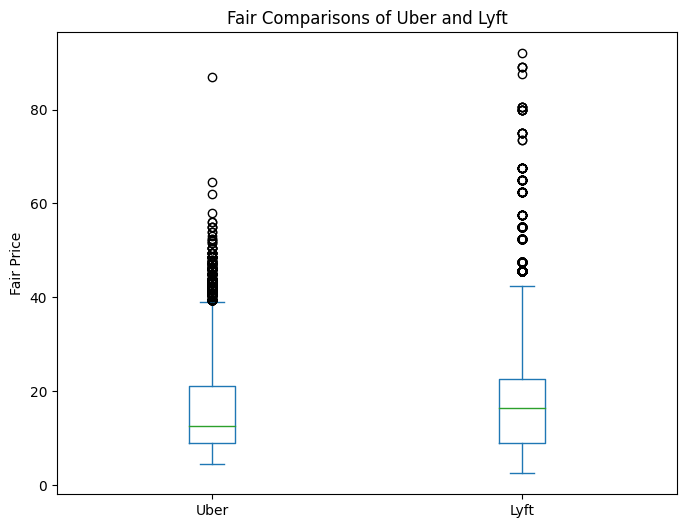

In [ ]:
fair_columns = pd.DataFrame({
    'Uber': uber_rides['price'],
    'Lyft': lyft_rides['price']
})
fair_columns.plot(kind='box', figsize=(8, 6))
plt.title('Fair Comparisons of Uber and Lyft')
plt.ylabel('Fair Price')
plt.show()

In [ ]:
cab_rides['date_time'] = pd.to_datetime(cab_rides['time_stamp'], unit='ms')
cab_rides['date']= cab_rides['date_time'].dt.date
cab_rides['day'] = cab_rides.date_time.dt.dayofweek
cab_rides['hour'] = cab_rides.date_time.dt.hour

cab_rides['fare_per_mile']= round(cab_rides.price/cab_rides.distance,2)

In [ ]:
weather['date_time'] = pd.to_datetime(weather['time_stamp'], unit='s')

In [ ]:
cab_rides['merge_date'] = cab_rides.source.astype(str) +" - "+ cab_rides.date_time.dt.date.astype("str") +" - "+ cab_rides.date_time.dt.hour.astype("str")
weather['merge_date'] = weather.location.astype(str) +" - "+ weather.date_time.dt.date.astype("str") +" - "+ weather.date_time.dt.hour.astype("str")

df_weather = weather.groupby(['merge_date'])
columns_to_mean = ['temp', 'clouds', 'pressure', 'rain', 'humidity', 'wind']
df_weather = df_weather[columns_to_mean].mean()
df_weather.reset_index(inplace=True)

In [ ]:
cab_rides_weather_merged = pd.merge(cab_rides, df_weather, on='merge_date')
cab_rides_weather_merged = cab_rides_weather_merged.drop(['id', 'product_id'], axis=1)
print("Shape after merging both datasets", cab_rides_weather_merged.shape)

Shape after merging both datasets (228197, 20)


In [ ]:
cab_rides_weather_merged.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,date_time,date,day,hour,fare_per_mile,merge_date,temp,clouds,pressure,rain,humidity,wind
0,0.44,Lyft,2018-12-16 09:30:07.890000105,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16 09:30:07.890000105,2018-12-16,6,9,11.36,Haymarket Square - 2018-12-16 - 9,38.460,0.290000,1022.25,NaN,0.760000,7.68
1,0.44,Lyft,2018-11-27 02:00:23.677000046,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27 02:00:23.677000046,2018-11-27,1,2,25.00,Haymarket Square - 2018-11-27 - 2,44.065,0.995000,1002.88,0.106,0.895000,12.63
2,0.44,Lyft,2018-11-30 04:53:02.749000072,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-30 04:53:02.749000072,2018-11-30,4,4,59.09,Haymarket Square - 2018-11-30 - 4,35.080,0.000000,1013.71,NaN,0.700000,5.25
3,0.44,Lyft,2018-11-29 03:49:20.223000050,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29 03:49:20.223000050,2018-11-29,3,3,20.45,Haymarket Square - 2018-11-29 - 3,37.680,0.433333,998.42,NaN,0.706667,11.16
4,0.44,Lyft,2018-12-17 18:25:12.138000011,North Station,Haymarket Square,16.5,1.0,Lux Black,2018-12-17 18:25:12.138000011,2018-12-17,0,18,37.50,Haymarket Square - 2018-12-17 - 18,40.780,0.930000,1000.15,NaN,0.790000,7.55


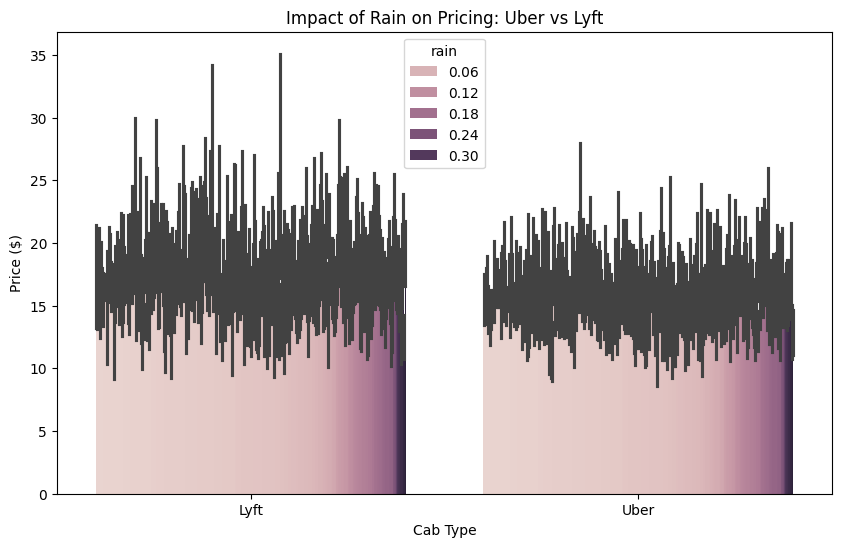

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='cab_type', y='price', hue='rain', data = cab_rides_weather_merged)
plt.title('Impact of Rain on Pricing: Uber vs Lyft')
plt.xlabel('Cab Type')
plt.ylabel('Price ($)')
plt.show()